In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint,uniform
import warnings
warnings.filterwarnings("ignore")


In [131]:
df = pd.read_csv('cleaned_data.csv') # dataset after Null handling and Outlier Treatments
df.head()

,age,gender,marital_status,occupation,education,income,location,driving_history,vehicle_type,vehicle_age,vehicle_value,coverage_type,num_claims,claim_amount,policy_duration,driving_experience,premium
0,52.189202,Female,Single,Retired,Bachelor,9807.305793,Rural,Clean,Sports Car,4.829941,6326.954867,Standard,1.000000,706.162366,4.889829,29.251777,3.301989e+05
1,43.118616,Male,Single,Professional,PhD,4519.972197,Suburban,Accidents,Sports Car,4.558468,4456.340715,Basic,1.000000,536.647560,3.853577,15.828655,1.921522e+05
2,21.855357,Female,Divorced,Student,PhD,63766.845580,Urban,Clean,Sedan,3.159116,9236.438040,Premium,0.993834,457.182907,1.409472,20.605316,2.018658e+05
3,43.358136,Female,Divorced,Retired,PhD,73165.859503,Urban,Clean,Sports Car,17.341562,34596.057856,Premium,0.000000,385.741987,1.686120,43.517050,1.500021e+06
4,27.267041,Female,Married,Blue Collar,PhD,78981.426627,Rural,Violations,Sedan,10.964243,5211.782999,Basic,0.000000,1113.081628,1.173914,9.431528,1.421104e+05


In [ ]:
pd.set_option('display.float_format','{:.2f}'.format)

In [82]:
# Rounding off numerical columns

df['age']=df['age'].apply(lambda x: int(x))

df['income']=df['income'].apply(lambda x: round(x,2))

df['vehicle_age']=df['vehicle_age'].apply(lambda x: round(x,1))

df['vehicle_value']=df['vehicle_value'].apply(lambda x: round(x,2))

df['driving_experience']=df['driving_experience'].apply(lambda x: int(x))

df['premium']=df['premium'].apply(lambda x: round(x,2))

df['policy_duration']=df['policy_duration'].apply(lambda x: round(x,1))

df['claim_amount']=df['claim_amount'].apply(lambda x: round(x,2))

In [83]:
val=df['num_claims'].value_counts().index
val

Index([0.0, 1.0, 2.0, 0.9938338506865892], dtype='float64', name='num_claims')

In [84]:
def num_claim(x):
    if x>0 and x<1:
        return 1
    elif x==0:
        return 0
    else:
        return round(x)

df['num_claims']=df['num_claims'].apply(lambda x: num_claim(x))

In [85]:
df['num_claims'].value_counts()

num_claims
1    29761
0    26076
2    12979
Name: count, dtype: int64

In [88]:
marital_st = {'Single':0, 'Divorced':1, 'Married':2}
coverage_type = {'Premium':2,'Basic':1,'Standard':0}
driving_hist = {'Accidents':2,'Violations':1,'Clean':0}

In [89]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['marital_status']=df['marital_status'].map(marital_st)
df['coverage_type']=df['coverage_type'].map(coverage_type)
df['driving_history']=df['driving_history'].map(driving_hist)

In [91]:
dummies = ['occupation','education','location','vehicle_type']
df_new=pd.get_dummies(data=df,columns=dummies,drop_first=True)

In [93]:
df_new=df_new.replace({True:1,False:0})

In [94]:
df_new.head()

,age,gender,marital_status,income,driving_history,vehicle_age,vehicle_value,coverage_type,num_claims,claim_amount,...,occupation_Retired,occupation_Student,education_High School,education_Master,education_PhD,location_Suburban,location_Urban,vehicle_type_Sedan,vehicle_type_Sports Car,vehicle_type_Truck
0,52,0,0,9807.31,0,4.8,6326.95,0,1,706.16,...,1,0,0,0,0,0,0,0,1,0
1,43,1,0,4519.97,2,4.6,4456.34,1,1,536.65,...,0,0,0,0,1,1,0,0,1,0
2,21,0,1,63766.85,0,3.2,9236.44,2,1,457.18,...,0,1,0,0,1,0,1,1,0,0
3,43,0,1,73165.86,0,17.3,34596.06,2,0,385.74,...,1,0,0,0,1,0,1,0,1,0
4,27,0,2,78981.43,1,11.0,5211.78,1,0,1113.08,...,0,0,0,0,1,0,0,1,0,0


In [132]:
df_new.columns

Index(['age', 'gender', 'marital_status', 'income', 'driving_history',
       'vehicle_age', 'vehicle_value', 'coverage_type', 'num_claims',
       'claim_amount', 'policy_duration', 'driving_experience', 'premium',
       'occupation_Professional', 'occupation_Retired', 'occupation_Student',
       'education_High School', 'education_Master', 'education_PhD',
       'location_Suburban', 'location_Urban', 'vehicle_type_Sedan',
       'vehicle_type_Sports Car', 'vehicle_type_Truck'],
      dtype='object')

In [158]:
num_cols = ['age','income','driving_history','vehicle_age','vehicle_value','coverage_type','num_claims',
            'claim_amount','policy_duration', 'driving_experience', 'premium']

In [161]:
for k, i in enumerate(num_cols):
    print(k,i)

0 age
1 income
2 driving_history
3 vehicle_age
4 vehicle_value
5 coverage_type
6 num_claims
7 claim_amount
8 policy_duration
9 driving_experience
10 premium


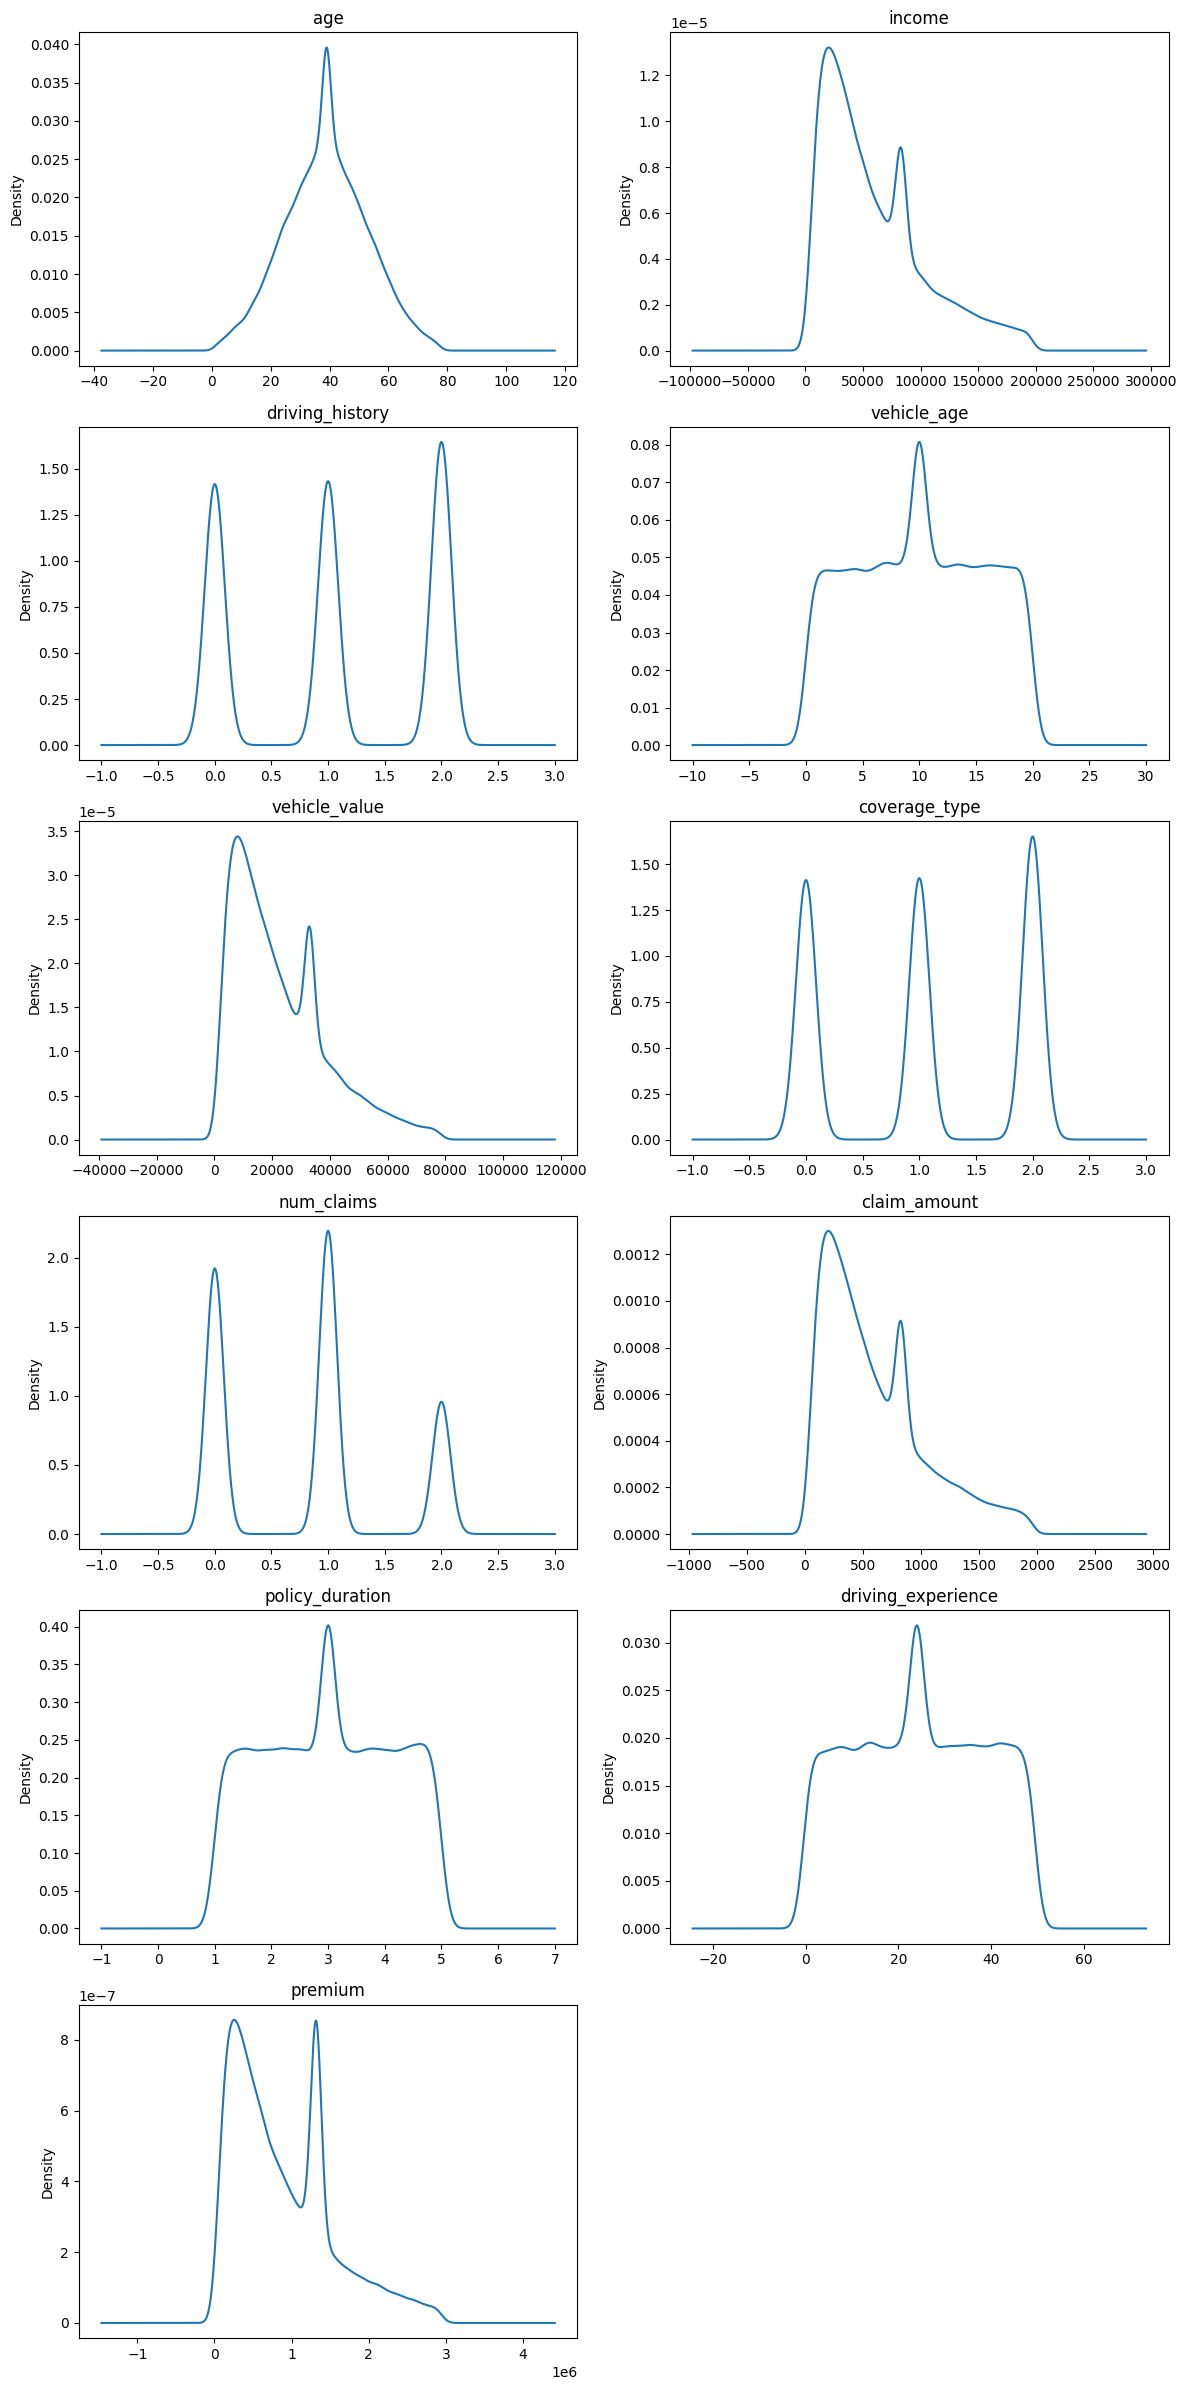

In [154]:
n_cols = 2  # Number of columns in subplot layout
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(12, n_rows * 4))  # Adjust figure size as needed

for k, i in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, k + 1)  # Create subplots
    df_new[i].plot(kind='kde')
    plt.title(i)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show() 

In [96]:
x = df_new.drop(columns='premium')
y = df_new['premium']

In [97]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=11)

In [98]:
xtrain.head()

,age,gender,marital_status,income,driving_history,vehicle_age,vehicle_value,coverage_type,num_claims,claim_amount,...,occupation_Retired,occupation_Student,education_High School,education_Master,education_PhD,location_Suburban,location_Urban,vehicle_type_Sedan,vehicle_type_Sports Car,vehicle_type_Truck
5465,45,1,0,111339.22,2,2.7,3409.71,1,2,488.83,...,1,0,0,0,1,0,1,0,0,1
29941,41,0,2,51364.77,1,0.1,52471.10,0,0,646.11,...,0,0,0,0,0,1,0,0,1,0
46438,55,1,0,25724.88,0,11.9,29783.10,0,2,1734.74,...,0,1,1,0,0,1,0,0,0,1
11335,44,0,1,63338.30,2,5.1,32985.46,2,0,1366.45,...,0,0,0,0,0,0,0,0,0,0
33776,36,1,2,7163.28,2,14.7,43948.70,1,1,1413.91,...,0,0,0,0,1,0,0,1,0,0


## OLS Linear Regression 

In [99]:
# OLS Linear Reg
xtrain_const = sm.add_constant(xtrain)
xtest_const = sm.add_constant(xtest)

ols_model = sm.OLS(ytrain,xtrain_const).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                premium   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:33:58   Log-Likelihood:            -7.6643e+05
No. Observations:               55052   AIC:                         1.533e+06
Df Residuals:                   55028   BIC:                         1.533e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.199e+05   7678.227    -80.736      0.000   -6.35e+05   -6.05e+05
age                      1.911e+04     82.881    230.547      0.000    1.89e+04    1.93e+04
gender                   2465.3672   2297.996      1.073      0.283   -2038.721    6969.456
marital_status           -897.0606   1391.527     -0.645      0.519   -3624.464    1830.343
income                     -0.0172      0.026     -0.653      0.514      -0.069       0.034
driving_history          -117.2704   1391.883     -0.084      0.933   -2845.370    2610.830
vehicle_age                -4.9997    204.477     -0.024      0.980    -405.776     395.777
vehicle_value              33.9792      0.072    474.016      0.000      33.839      34.120
coverage_type            1298.1493   1391.677      0.933      0.351   -1429.547    4025.846
num_claims                756.9339   1576.750      0.480      0.631   -2333.507    3847.375
claim_amount                0.9683      2.644      0.366      0.714      -4.215       6.151
policy_duration         -1129.1635   1016.720     -1.111      0.267   -3121.942     863.615
driving_experience       -117.9687     81.831     -1.442      0.149    -278.358      42.420
occupation_Professional  -992.9941   3173.554     -0.313      0.754   -7213.183    5227.195
occupation_Retired        287.1260   3192.301      0.090      0.928   -5969.806    6544.058
occupation_Student        565.8881   3178.623      0.178      0.859   -5664.235    6796.011
education_High School   -2692.3701   3176.034     -0.848      0.397   -8917.420    3532.680
education_Master         -125.7747   3180.161     -0.040      0.968   -6358.913    6107.364
education_PhD            4354.9897   3179.703      1.370      0.171   -1877.251    1.06e+04
location_Suburban       -5807.1349   2885.303     -2.013      0.044   -1.15e+04    -151.920
location_Urban          -1299.2218   2788.120     -0.466      0.641   -6763.957    4165.513
vehicle_type_Sedan       5762.8743   3185.040      1.809      0.070    -479.826     1.2e+04
vehicle_type_Sports Car  2583.2555   3170.046      0.815      0.415   -3630.057    8796.568
vehicle_type_Truck       3122.8270   3177.128      0.983      0.326   -3104.366    9350.020
==============================================================================
Omnibus:                     6172.893   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44100.871
Skew:                           0.298   Prob(JB):                         0.00
Kurtosis:                       7.344   Cond. No.                     5.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

#### ols inference
1)r2 and adjusted r2 both are 0.825, so this suggests that there is no overfit<br>
2)Condition number - 53100000 - suggests very high multicollinearity<br>
3)jarque-bera probability is 0.00 so normality test failed<br>
4)no autocorrelation - durbin watson is 1.99<br>
5)age ,vehicle value, location suburban has p-val < 0.05 so they are statistically significant<br>
6) fstat - 1xe06 inidicates model is statistically significant
7) pval (fstat) is 0.00 - indicates model's significance (atleast one predictor variable is significantly related to predictor)

In [100]:
xtrain.reset_index(inplace=True,drop=True)

In [101]:
ytrain.reset_index(inplace=True,drop=True)

## OLS Linear Regression (Transformed)

In [102]:
cols = ['age','income','vehicle_age','vehicle_value','claim_amount','policy_duration','driving_experience']

In [103]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')

xt1 = pt.fit_transform(xtrain[cols])


In [104]:
xt1df=pd.DataFrame(xt1,columns=cols)

In [105]:
xt1df=pd.concat([xt1df,xtrain.drop(columns=cols)],axis=1)

In [106]:
xt1df.shape

(55052, 23)

In [107]:
ytrain.shape

(55052,)

In [108]:
xt1_const = sm.add_constant(xt1df)
#xt2_const = sm.add_constant(xt2)

xt1_ols = sm.OLS(ytrain,xt1_const).fit()
xt1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                premium   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     9656.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:33:59   Log-Likelihood:            -7.6989e+05
No. Observations:               55052   AIC:                         1.540e+06
Df Residuals:                   55028   BIC:                         1.540e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     8.83e+05   5068.997    174.203      0.000    8.73e+05    8.93e+05
age                      2.532e+05   1225.262    206.641      0.000    2.51e+05    2.56e+05
income                  -1224.5594   1221.870     -1.002      0.316   -3619.434    1170.315
vehicle_age                28.5829   1221.944      0.023      0.981   -2366.435    2423.601
vehicle_value            5.361e+05   1225.347    437.494      0.000    5.34e+05    5.38e+05
claim_amount              163.4027   1222.109      0.134      0.894   -2231.939    2558.744
policy_duration          -109.2026   1221.852     -0.089      0.929   -2504.041    2285.636
driving_experience      -1581.4458   1222.099     -1.294      0.196   -3976.769     813.877
gender                   4259.1433   2447.015      1.741      0.082    -537.024    9055.311
marital_status          -1119.5437   1481.792     -0.756      0.450   -4023.867    1784.780
driving_history          -642.8080   1482.160     -0.434      0.665   -3547.851    2262.235
coverage_type            1040.8571   1481.936      0.702      0.482   -1863.748    3945.462
num_claims               1073.4989   1679.016      0.639      0.523   -2217.384    4364.382
occupation_Professional  2024.7216   3379.348      0.599      0.549   -4598.825    8648.269
occupation_Retired        511.9858   3399.385      0.151      0.880   -6150.832    7174.804
occupation_Student       -683.9137   3384.803     -0.202      0.840   -7318.152    5950.324
education_High School   -1045.5388   3382.007     -0.309      0.757   -7674.297    5583.219
education_Master          506.2403   3386.392      0.149      0.881   -6131.112    7143.592
education_PhD            4217.6304   3385.896      1.246      0.213   -2418.749    1.09e+04
location_Suburban       -5095.3037   3072.443     -1.658      0.097   -1.11e+04     926.706
location_Urban          -2635.1391   2968.943     -0.888      0.375   -8454.289    3184.011
vehicle_type_Sedan       4183.8684   3391.617      1.234      0.217   -2463.724    1.08e+04
vehicle_type_Sports Car  2591.5737   3375.649      0.768      0.443   -4024.721    9207.869
vehicle_type_Truck       3977.7241   3383.175      1.176      0.240   -2653.323    1.06e+04
==============================================================================
Omnibus:                    15153.239   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44704.982
Skew:                           1.438   Prob(JB):                         0.00
Kurtosis:                       6.348   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_data = pd.DataFrame()
vif_data['Features'] = xt1df.columns
vif_data['VIF']= [vif(xt1df.values,i)for i in range(xt1df.shape[1])]

vif_data

,Features,VIF
0,age,1.005774
1,income,1.000191
2,vehicle_age,1.000286
3,vehicle_value,1.005831
4,claim_amount,1.000597
5,policy_duration,1.000181
6,driving_experience,1.000567
7,gender,1.812644
8,marital_status,2.148574
9,driving_history,2.388393


In [110]:
ytrain_lg = pd.DataFrame(np.log(ytrain))
ytrain_lg.head()

,premium
0,11.946940
1,14.583999
2,14.309555
3,14.090583
4,14.288255


In [111]:
final_ols = sm.OLS(ytrain_lg,xt1_const).fit()
final_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                premium   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:34:02   Log-Likelihood:                -15189.
No. Observations:               55052   AIC:                         3.043e+04
Df Residuals:                   55028   BIC:                         3.064e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.3671      0.006   2370.305      0.000      13.356      13.378
age                         0.3999      0.001    293.344      0.000       0.397       0.403
income                     -0.0002      0.001     -0.149      0.882      -0.003       0.002
vehicle_age                 0.0011      0.001      0.776      0.438      -0.002       0.004
vehicle_value               0.7873      0.001    577.489      0.000       0.785       0.790
claim_amount                0.0004      0.001      0.320      0.749      -0.002       0.003
policy_duration            -0.0023      0.001     -1.708      0.088      -0.005       0.000
driving_experience         -0.0017      0.001     -1.260      0.208      -0.004       0.001
gender                      0.0040      0.003      1.479      0.139      -0.001       0.009
marital_status             -0.0022      0.002     -1.351      0.177      -0.005       0.001
driving_history             0.0014      0.002      0.855      0.393      -0.002       0.005
coverage_type              -0.0001      0.002     -0.084      0.933      -0.003       0.003
num_claims                 -0.0024      0.002     -1.274      0.203      -0.006       0.001
occupation_Professional    -0.0081      0.004     -2.162      0.031      -0.015      -0.001
occupation_Retired          0.0023      0.004      0.596      0.551      -0.005       0.010
occupation_Student          0.0023      0.004      0.604      0.546      -0.005       0.010
education_High School      -0.0026      0.004     -0.684      0.494      -0.010       0.005
education_Master            0.0004      0.004      0.102      0.919      -0.007       0.008
education_PhD              -0.0004      0.004     -0.099      0.921      -0.008       0.007
location_Suburban          -0.0050      0.003     -1.466      0.143      -0.012       0.002
location_Urban              0.0024      0.003      0.717      0.473      -0.004       0.009
vehicle_type_Sedan         -0.0027      0.004     -0.710      0.478      -0.010       0.005
vehicle_type_Sports Car    -0.0031      0.004     -0.822      0.411      -0.010       0.004
vehicle_type_Truck         -0.0020      0.004     -0.534      0.593      -0.009       0.005
==============================================================================
Omnibus:                    26484.987   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           541158.634
Skew:                           1.840   Prob(JB):                         0.00
Kurtosis:                      17.912   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
xtest.reset_index(drop=True,inplace=True)
ytest.reset_index(drop=True,inplace=True)
xtest_ = pd.concat([pd.DataFrame(pt.fit_transform(xtest[cols]),columns=cols),xtest.drop(columns=cols,axis=1)],axis=1)
xtest_.head()

,age,income,vehicle_age,vehicle_value,claim_amount,policy_duration,driving_experience,gender,marital_status,driving_history,...,occupation_Retired,occupation_Student,education_High School,education_Master,education_PhD,location_Suburban,location_Urban,vehicle_type_Sedan,vehicle_type_Sports Car,vehicle_type_Truck
0,-1.374759,-1.950299,0.509716,1.146555,0.172801,-1.554205,0.498813,0,0,2,...,0,0,0,0,0,1,0,0,0,1
1,-1.225948,0.067150,-0.574600,-1.142664,1.935132,-1.069916,-0.682890,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1.016103,0.599061,-0.612346,0.030140,-0.420132,0.539946,-0.839942,0,1,2,...,0,1,0,0,0,1,0,1,0,0
3,-0.491229,0.737428,-1.386274,-1.773407,1.106658,-0.513245,-1.449563,0,1,0,...,0,1,0,1,0,0,1,0,0,1
4,0.015717,-0.184138,-0.407414,-0.722902,-0.999315,0.624763,-1.449563,0,0,2,...,0,1,1,0,0,1,0,0,1,0


In [113]:
xtest1 = sm.add_constant(xtest_)
ypred = xt1_ols.predict(xtest1)

rmse = np.sqrt(mean_squared_error(ytest,ypred))
print(rmse)

291118.38356146606


In [114]:
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator,RegressorMixin
class ols_regressor(BaseEstimator,RegressorMixin):
    def fit(self,x,y):
        x=sm.add_constant(x)
        self.model = sm.OLS(y,x).fit()
        return self
    def predict(self,x):
        x=sm.add_constant(x)
        return self.model.predict(x)
ols_model = ols_regressor()

In [115]:
pred=cross_val_predict(ols_model,xt1df,ytrain,cv=5)

cv_rmse = np.sqrt(mean_squared_error(ytrain,pred))
print('cv_rmse',cv_rmse)

cv_rmse 286756.9485743016


## Here the residuals is not normally distributed inspite of performing log transformation of target, so we can conclude that linear model will is not optimal, also RMSE is high. <br> We can try building tree-based / ensemble models

## Decision Tree

In [116]:
dt = DecisionTreeRegressor(random_state=11)

dt.fit(xtrain,ytrain)

ypred=dt.predict(xtest)

dt_rmse = np.sqrt(mean_squared_error(ytest,ypred))
print('dt_rmse',dt_rmse)

dt_rmse 138690.45696432568


In [117]:
dt_cv_pred = cross_val_predict(dt,xtrain,ytrain,cv=5)
dt_cv_rmse = np.sqrt(mean_squared_error(ytrain,dt_cv_pred))
print('dt_cv_rmse',dt_cv_rmse)

dt_cv_rmse 143444.46793387123


In [118]:
# gridsearch cv
param_grid = {  'criterion':['squared_error'],
    'max_depth':[None,2,4,6,8,9,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8]}

search = GridSearchCV(estimator=dt,param_grid=param_grid, scoring='neg_mean_squared_error',cv=3)

search.fit(xtrain,ytrain)

best_params=search.best_params_
best_score = search.best_score_
print(best_params)


{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [119]:
print(np.sqrt(abs(best_score)))

113709.02336342909


In [120]:
best_model = search.best_estimator_
ypred=best_model.predict(xtest)

print("test rmse",np.sqrt(mean_squared_error(ytest,ypred)))

test rmse 110928.56297210041


## Random Forest

In [122]:
rf = RandomForestRegressor(n_estimators=100,random_state=11)
rf.fit(xtrain,ytrain)

ypred = rf.predict(xtest)

print("rf test rmse",np.sqrt(mean_squared_error(ytest,ypred)))

rf test rmse 100448.32504996697


In [123]:
# rf randomsearch cv

rf_param = {
    'n_estimators':[100,150],
    'max_depth':[None,10,20,30],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5)
    }
rf_search = RandomizedSearchCV(estimator=rf,param_distributions=rf_param,scoring='neg_mean_squared_error',cv=3,n_iter=50,random_state=11)

rf_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=11),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E40DADBE60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E47248B1D0>,
                                        'n_estimators': [100, 150]},
                   random_state=11, scoring='neg_mean_squared_error')

In [124]:
best_rf_params = rf_search.best_params_
best_rf_params

{'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 150}

In [125]:
best_rf_model = rf_search.best_estimator_
ypred=best_rf_model.predict(xtest)

print("rf tuned test rmse",np.sqrt(mean_squared_error(ytest,ypred)))

rf tuned test rmse 99071.22792578854


## XGB 

In [126]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)

xgb.fit(xtrain,ytrain)

ypred = xgb.predict(xtest)

print("xgb test rmse",np.sqrt(mean_squared_error(ytest,ypred)))

xgb test rmse 104369.85964273219


In [ ]:
!pip install scikit-learn==1.5.0
# __sklearn.tags__ compatibility issue with sklearn 1.6.0 so downgraded to 1.5.0

In [127]:
# xgb gridsearch cv

xgb = XGBRegressor()

xgb_param_grid = {
    'n_estimators':[100,200],
    'max_depth':randint(3,10),
    'learning_rate':uniform(0.01,0.3),
    'subsample': uniform(0.7,0.9)
}

xgb_search = RandomizedSearchCV(estimator=xgb,param_distributions=xgb_param_grid,
                                scoring='neg_mean_squared_error',cv=3,
                               n_iter=50,random_state=11,verbose=1)

xgb_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E4724B5400>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E421D237A0>,
                                        'n_estimators': [100, 200],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E4724A3800>},
                   random_state=11, scoring='neg_mean_squared_error',
                   verbose=1)

In [128]:
print("xgb best params",xgb_search.best_params_)
print("xgb best cv mse", np.sqrt(abs(xgb_search.best_score_)))

xgb best params {'learning_rate': np.float64(0.11022486829070172), 'max_depth': 6, 'n_estimators': 100, 'subsample': np.float64(0.9869832157827175)}
xgb best cv mse 106438.37170647824


In [129]:
best_xgb_model = xgb_search.best_estimator_
ypred=best_xgb_model.predict(xtest)

print("xgb test rmse",np.sqrt(mean_squared_error(ytest,ypred)))

xgb test rmse 101006.6780321702


## So comparatively Random Forest with hyperparameter tuning has least rmse and is chosen as final model

## Deployment

In [ ]:
import pickle

filename = "00Projects_new/insurance-prediction-deployment/insurance_prediction_final.pkl"

with open(filename,'wb') as file:
    pickle.dump(best_rf_model,file)